In [3]:
from pathlib import Path

import pandas as pd

In [27]:
outdir = Path("../../outdirs/0513")
studies = pd.read_csv(outdir / "studies.csv")
trials = pd.read_csv(outdir / "trials.csv")
trial_values = pd.read_csv(outdir / "trial_values.csv")
trial_user_attrs = pd.read_csv(outdir / "trial_user_attributes.csv")
trial_params = pd.read_csv(outdir / "trial_params.csv")
trial_inter_vals = pd.read_csv(outdir / "trial_intermediate_values.csv")

In [28]:
trial_values = pd.pivot_table(trial_values, "value", "trial_id", "objective")
trial_values.columns = [f"obj_{x}" for x in trial_values.columns]
display(trial_values.head())

trial_user_attrs = pd.pivot_table(trial_user_attrs, "value_json", "trial_id", "key")
display(trial_user_attrs.head())

trial_params = pd.pivot_table(trial_params, "param_value", "trial_id", "param_name")
display(trial_params.head())

trial_inter_vals = trial_inter_vals.set_index(["trial_id", "step"]).sort_index()

,obj_0
trial_id,
1,0.736
2,0.752
3,0.769
4,0.805
5,0.668


key,model_size
trial_id,
1,50100.0
2,312000.0
3,757000.0
4,877000.0
5,49800.0


param_name,backbone_hidden_dim,backbone_output_dim,batch_size,dropout,embed_dim,gae_lambda,grad_norm_clip,hand_embed_dim,hand_hidden_dim,hist_hidden_dim,hist_output_dim,lr,policy_hidden_dim,policy_query_dim,tasks_embed_dim,tasks_hidden_dim,weight_decay
trial_id,,,,,,,,,,,,,,,,,
1,32.0,16.0,64.0,0.030000,32.0,0.950000,1.000000,32.0,32.0,32.0,32.0,0.001000,32.0,16.0,32.0,32.0,0.001000
2,80.0,48.0,256.0,0.059856,16.0,0.894398,0.115088,48.0,48.0,208.0,96.0,0.000918,16.0,8.0,16.0,48.0,0.034038
3,144.0,96.0,96.0,0.003174,64.0,0.949537,0.233782,64.0,64.0,224.0,208.0,0.000772,80.0,16.0,64.0,64.0,0.021276
4,496.0,96.0,192.0,0.015080,16.0,0.915119,0.297988,64.0,80.0,240.0,192.0,0.000999,80.0,16.0,32.0,64.0,0.002873
5,48.0,24.0,224.0,0.071791,16.0,0.936589,0.114975,32.0,48.0,48.0,16.0,0.007763,16.0,16.0,32.0,32.0,0.000179


In [29]:
df = (
    studies.merge(trials, on="study_id")
    .join(trial_values, on="trial_id")
    .join(trial_user_attrs, on="trial_id")
    .join(trial_params, on="trial_id")
)
df = df[df["study_id"] == 1].copy()
df["state"] = df["state"].astype("category")
df

,study_id,study_name,trial_id,number,state,datetime_start,datetime_complete,obj_0,model_size,backbone_hidden_dim,...,hand_embed_dim,hand_hidden_dim,hist_hidden_dim,hist_output_dim,lr,policy_hidden_dim,policy_query_dim,tasks_embed_dim,tasks_hidden_dim,weight_decay
0,1,out_0,1,0,COMPLETE,2025-05-12 21:57:01.074521,2025-05-12 23:18:22.212196,0.736,50100.0,32.0,...,32.0,32.0,32.0,32.0,0.001000,32.0,16.0,32.0,32.0,0.001000
1,1,out_0,2,1,COMPLETE,2025-05-12 21:57:01.163694,2025-05-12 22:35:26.691614,0.752,312000.0,80.0,...,48.0,48.0,208.0,96.0,0.000918,16.0,8.0,16.0,48.0,0.034038
2,1,out_0,3,2,COMPLETE,2025-05-12 21:57:01.254470,2025-05-12 22:59:19.957457,0.769,757000.0,144.0,...,64.0,64.0,224.0,208.0,0.000772,80.0,16.0,64.0,64.0,0.021276
3,1,out_0,4,3,COMPLETE,2025-05-12 21:57:01.346879,2025-05-12 22:42:20.799461,0.805,877000.0,496.0,...,64.0,80.0,240.0,192.0,0.000999,80.0,16.0,32.0,64.0,0.002873
4,1,out_0,5,4,COMPLETE,2025-05-12 21:57:01.483560,2025-05-12 22:34:53.484841,0.668,49800.0,48.0,...,32.0,48.0,48.0,16.0,0.007763,16.0,16.0,32.0,32.0,0.000179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,out_0,320,319,PRUNED,2025-05-14 19:08:59.754516,2025-05-14 19:51:54.668891,0.674,1100000.0,464.0,...,80.0,96.0,176.0,160.0,0.000414,112.0,104.0,80.0,80.0,0.000466
320,1,out_0,321,320,PRUNED,2025-05-14 19:09:08.255319,2025-05-14 19:41:33.175558,0.751,634000.0,448.0,...,48.0,48.0,176.0,160.0,0.000677,112.0,104.0,48.0,48.0,0.003339
321,1,out_0,322,321,COMPLETE,2025-05-14 19:13:28.378415,2025-05-14 20:05:25.497123,0.821,726000.0,448.0,...,48.0,48.0,176.0,160.0,0.000475,112.0,104.0,48.0,48.0,0.002068
322,1,out_0,323,322,PRUNED,2025-05-14 19:17:39.405751,2025-05-14 20:05:38.380616,0.757,681000.0,448.0,...,48.0,48.0,192.0,176.0,0.000231,112.0,104.0,48.0,48.0,0.000998


In [30]:
def bin_plot(df, x_col, y_col, num_bins=5, **kwargs):
    if num_bins == "category":
        bins = df[x_col]
    else:
        bins = pd.qcut(df[x_col], num_bins, duplicates="drop")
    plot_df = df.groupby(bins, observed=False)[[x_col, y_col]].median()
    plot_df["max"] = df.groupby(bins, observed=False)[y_col].max()
    plot_df.plot(x=x_col, y=[y_col, "max"], **kwargs)

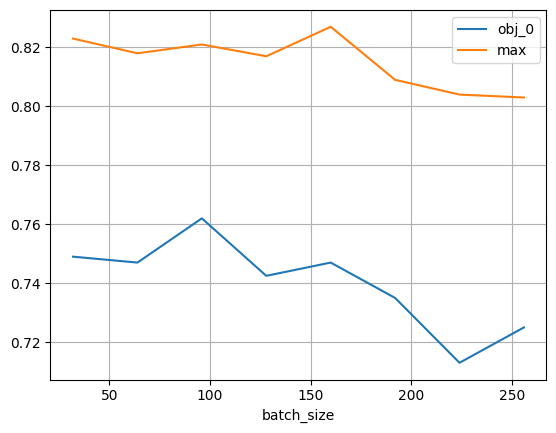

In [31]:
bin_plot(df, "batch_size", "obj_0", grid=True, num_bins="category")

<Axes: xlabel='batch_size', ylabel='obj_0'>

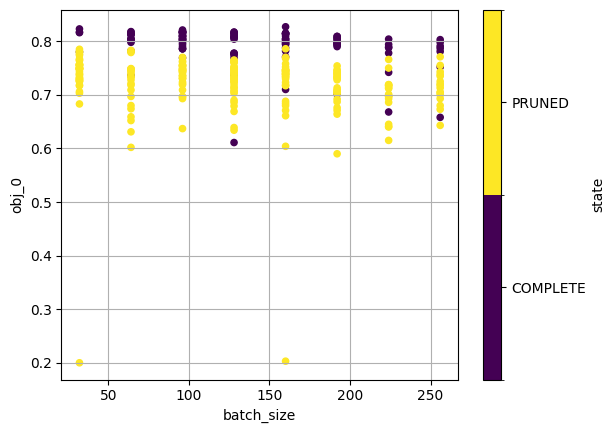

In [32]:
df.plot.scatter(x="batch_size", y="obj_0", grid=True, c="state", cmap="viridis")

In [39]:
def plot_trial(trial_id, **kwargs):
    plot_df = trial_inter_vals.loc[trial_id]
    plot_df["intermediate_value"].plot(**kwargs)

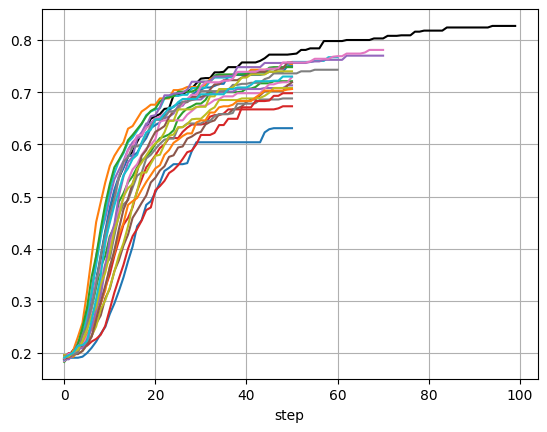

In [43]:
plot_trial(217, grid=True, color="black")
for trial_id in df.query("state == 'PRUNED'").sample(20, random_state=42)["trial_id"]:
    plot_trial(trial_id, grid=True)